## Strategic Analysis of Free Apps from Ads Profit Approach


In this report, we'll analysis and explain datasets to help companies or anyone that works with apps building. In particular, the datasets that wil be analised are **Mobile Apps Stores - Apple** (https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) and **Google Play Store Apps**(https://www.kaggle.com/lava18/google-play-store-apps), two tables from june, 2018. Our goal is explain more about free apps for english language users, in order to use ads as revenue source.   

We'll initiate with a quick approach how to explore these datasets; going through to find and fix data inconsistencies such as writing erros and duplicate entries. Lastly, we'll see how to apply basic build strategies and parameters to decision making related to apps building.     

We hope that you enjoy this!

For any questions, suggestions or corrections, send me a mail or message that I'll have pleasure to answer!

**e-mail:** osmancesar.mr@gmail.com


**linkedin:** https://www.linkedin.com/in/osman-rodrigues/

### 1. Oppening and Fast Checking Files and Datasets

The first step we should do is open datasets files and check its firsts rows and columns. It's allow us to verify which data type of informations we'll dealing with.   

In [2]:
# 1.1 To export and open dataset files

opened_file_apple = open('AppleStore.csv', encoding="utf8")
opened_file_google = open('googleplaystore.csv', encoding="utf8")
from csv import reader
read_file_apple = reader(opened_file_apple)
read_file_google = reader(opened_file_google)
apps_data_apple = list(read_file_apple)
apps_data_google = list(read_file_google)


print('First rows of Apple Store Apps:',('\n'),apps_data_apple[:3])
('\n')
print('First rows of Google Store Apps:',('\n'),apps_data_google[:3])


First rows of Apple Store Apps: 
 [['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'], ['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1'], ['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']]
First rows of Google Store Apps: 
 [['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], ['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up'], ['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+',

### 2. Searching, Idetifying and Removing Wrong Entries

After choosed the datasets above, we took a quick read in Kaggle forum to find possibles questions about how clean these datasets are. After that, we saw a incosistency in 'Reviews' column of Google Store Apps table.     

In [3]:
# 2.1 Wrong entry identified position after pre analysis in forum

data_slice = apps_data_google[10473]
print (data_slice)

#search and confirm wrong data statement 

for row in apps_data_google:
    if len(row) != len(apps_data_google[0]):
        print(row)
        print(apps_data_google.index(row))

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']
10473


In [4]:
# 2.2 Removing wrong data 

del apps_data_google[10473]

### 3. Exploring the Datasets

To do specific analysis and measure of these datasets, we can use the function below in which the input sequence is dataset, start row, end row and the conditional statement.     

In [5]:
# 3.1 Explore_dataset_function
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))
        
explore_data(apps_data_apple, 0, 1, apps_data_apple[:1])
print('\n')
explore_data(apps_data_google, 0, 1, apps_data_google[:1])

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


Number of rows: 7198
Number of columns: 16


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


Number of rows: 10841
Number of columns: 13


### 4. Searching, Cleaning and Separating Duplicated for Non-duplicated Entries

Is common large datasets have duplicated entries. But, to remove them, we need a careful analysis to find parameteres that allow us for a correctly removing. Below, some steps to help us in searching, confirmating and removing duplicate entries. 

In [6]:
# 4.1 Until here, we've been cleaning up these datasets. 
# Now, we'll clear the duplicate entries of Android dataset.
# For instance, let's print fews Instagram entries to see that 
# duplicate facts occurs:

for  app in apps_data_google:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


In [7]:
# 4.2 To count the number of occurrences, we can use this code below:

duplicate_g_apps = []
unique_g_apps = []

for g_app in apps_data_google:
    g_name = g_app[0]
    if g_name in unique_g_apps:
        duplicate_g_apps.append(g_name)
    else:
        unique_g_apps.append(g_name)
            
duplicate_a_apps = []
unique_a_apps = []

for a_app in apps_data_apple:
    a_name = a_app[1]
    if a_name in unique_a_apps:
        duplicate_a_apps.append(a_name)
    else:
        unique_a_apps.append(a_name)
            
print('Number of duplicate Android apps: ', len(duplicate_g_apps))
print('\n')
print('Example of duplicate Android apps: ', duplicate_g_apps[:10])
print('\n')
print('Number of duplicate iOS apps: ', len(duplicate_a_apps))
print('\n')
print('Example of duplicate iOS apps: ', duplicate_a_apps[:10])

#So that we're didn't equivocate randomly remove duplicate data,
#we can observe unique parameteres in the same row associeted 
#to the duplicate app entries. For example, the number of reviews
#of an app.

Number of duplicate Android apps:  1181


Example of duplicate Android apps:  ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack']


Number of duplicate iOS apps:  2


Example of duplicate iOS apps:  ['Mannequin Challenge', 'VR Roller Coaster']


In [8]:
# 4.3 creating a dictionary to store non-duplicate entries:

reviews_g_max = {}
for g_app in apps_data_google[1:]:
    g_name = g_app[0]
    g_n_reviews = float(g_app[3])
    
    if g_name in reviews_g_max and reviews_g_max[g_name] < g_n_reviews:
        reviews_g_max[g_name] = g_n_reviews
        
    elif g_name not in reviews_g_max:
        reviews_g_max[g_name] = g_n_reviews
        
reviews_a_max = {}
for a_app in apps_data_apple[1:]:
    a_name = a_app[1]
    a_n_reviews = float(a_app[5])
    
    if a_name in reviews_a_max and reviews_a_max[a_name] < a_n_reviews:
        reviews_a_max[a_name] = a_n_reviews

        
    elif a_name not in reviews_a_max:
        reviews_a_max[a_name] = a_n_reviews
        
print('Nº of Cleaned Google Play Store Apps: ', len(reviews_g_max))
print('Nº of Cleaned Apple Store Apps: ', len(reviews_a_max))

Nº of Cleaned Google Play Store Apps:  9659
Nº of Cleaned Apple Store Apps:  7195


In [9]:
# 4.4 To remove the duplicate rows using the dictonary in technic above:

# 4.4.1 Creat a list to store clening apps
google_clean = [] 
g_already_added = []

# 4.4.2 Loop through the data sets 
for g_app in apps_data_google[1:]:
    g_name = g_app[0]
    g_n_reviews = float(g_app[3])

# 4.4.3 Compare row to row and separate singular and already appened entries  
    if (g_n_reviews == reviews_g_max[g_name]) and (g_name not in g_already_added):
        google_clean.append(g_app)
        g_already_added.append(g_name)

# 4.4.4 Do the same steps to both datasets        
apple_clean = []
a_already_added = []

for a_app in apps_data_apple[1:]:
    a_name = a_app[1]
    a_n_reviews = float(a_app[5])
    
    if (a_n_reviews == reviews_a_max[a_name]) and (a_name not in a_already_added):
        apple_clean.append(a_app)
        a_already_added.append(a_name)
        
# 4.4.5 check the cleaning datasets to confirm the work done
        
print('Nº of Cleaned Google Play Store Apps: ', len(google_clean))
print(google_clean[:2])

print('Nº of Cleaned Apple Store Apps: ', len(apple_clean))
print(apple_clean[:2])


Nº of Cleaned Google Play Store Apps:  9659
[['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up'], ['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']]
Nº of Cleaned Apple Store Apps:  7195
[['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1'], ['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']]


### 5. Entries Validation

To reach the goals of this analysis, we need to validate the Targeted Audience of each apps of these datasets through the basic language used. This means that, if the app be wrote in non-english character, it must be removed from our analysis. There are other patterns around free apps peharps we will consider, but for now let's still leading with we started at principle.      

In [10]:
# 5.1 Using a common english character validation function

def char_valid(string):
    n_checks = 0
    for character in string:
        if ord(character) > 127:
            n_checks += 1
            if n_checks > 3:
                return False
       
    return True

#testing the function

check_1 = print(char_valid('爱奇艺PPS -《欢乐颂2》电视剧热播'))
check_2= print(char_valid('Docs To Go™ Free Office Suite'))
check_3 = print(char_valid('Instachat 😜'))



False
True
True


In [11]:
# 5.2 Applying character validation function on android and apple datasets

g_apps_english = []
a_apps_english = []

for g_app in google_clean:
    g_name = g_app[0]
    if char_valid(g_name):
        g_apps_english.append(g_app)

for a_app in apple_clean:
    a_name = a_app[1]
    if char_valid(a_name):
        a_apps_english.append(a_app)

# 5.3 Checking results        
        
explore_data(g_apps_english, 0, 3, True)
print('\n')
explore_data(a_apps_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

In [12]:
# 5.4 Collecting free apps

g_apps_free = []

for g_row in g_apps_english:
    g_price = g_row[7]
    if g_price == '0':
        g_apps_free.append(g_row)
        
a_apps_free = []

for a_row in a_apps_english:
    a_price = a_row[4]
    if a_price == '0.0':
        a_apps_free.append(a_row)

print('Nº of Free Apps of Google Play Store: ', len(g_apps_free))
print('Nº of Free Apps of Apple Store: ',len(a_apps_free))

Nº of Free Apps of Google Play Store:  8864
Nº of Free Apps of Apple Store:  3220


### 6. Build Strategy 

Until here, the steps which we did was for turn our datasets more clear and focused in english free user apps to use ads as revenue source. 

The next aim is to inspect the most common genres of apps of determined market. Thus, we need to build a frequency table to guide us around the most attractive genres.

Columns to collect apps genres information:

**Google Play Store dataset - Index 9 and 1**

**Apple Store dataset - Index 11**

In [13]:
# 6.1 Bulding a frequency table 

def freq_table(dataset, index):
    
    frequency_table = {}
    
    for app in dataset[1:]:
        genre = app[index]
        
        if genre in frequency_table:
            frequency_table[genre] += 1
        else:
            frequency_table[genre] = 1
    
    for key in frequency_table:
        frequency_table[key] = float((frequency_table[key]/len(dataset))*100)
    
    return frequency_table

def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])


print('-iOS Apps Common Genres-')
print('\n')
genres_apple = display_table(a_apps_free, 11)
print('\n')
print('-Android Apps Common Genres-')
print('\n')
genres_google = display_table(g_apps_free, 9)
print('\n')
print('-Android Apps Common Categories-')
print('\n')
category_google = display_table(g_apps_free, 1)


-iOS Apps Common Genres-


Games : 58.13664596273293
Entertainment : 7.888198757763975
Photo & Video : 4.968944099378882
Education : 3.6645962732919255
Social Networking : 3.260869565217391
Shopping : 2.608695652173913
Utilities : 2.515527950310559
Sports : 2.142857142857143
Music : 2.049689440993789
Health & Fitness : 2.018633540372671
Productivity : 1.7391304347826086
Lifestyle : 1.5838509316770186
News : 1.3354037267080745
Travel : 1.2422360248447204
Finance : 1.1180124223602486
Weather : 0.8695652173913043
Food & Drink : 0.8074534161490683
Reference : 0.5590062111801243
Business : 0.5279503105590062
Book : 0.43478260869565216
Navigation : 0.18633540372670807
Medical : 0.18633540372670807
Catalogs : 0.12422360248447205


-Android Apps Common Genres-


Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115

### 7. Answering Raised Questions

#### 7.1 Analyzing the Frequency Table generated from the Category and Genres column of the Google Play Store dataset.


- 7.1.1 What are the most common genres?


**Answer** 

5 most common Android Apps categories percentages (%):

Family : 18.9

Game : 9.72

Tools : 8.46

Business : 4.59

Lifestyle : 3.90


- 7.1.2 What other patterns do you see?


**Answer** 

1. Health related apps are in 8th and 12th most commons;
2. Business related apps are in 4th, 6th and 7th most commons; 
3. Global occurrence related apps - Weather (0.8%) and Events (0.71%) - are in most low frequency.



#### 7.2 Analyzing the Frequency Table generated from the Genre column of the Apple Store dataset.


- 7.2.1 Compare the patterns you see for the Google Play Store market with those you saw for the Apple Store market.


**Answer** 

5 most common iOS Apps genres percentages (%):

Games : 58.13

Entertainment : 7.88

Photo & Video : 4.96

Education : 3.66

Social Networking : 3.26

In this sense, Android Apps seems more curvated to learning and productivity purposes and iOS Apps is more proximily of entertaiment and media content.    

- 7.2.2 Can you recommend an app profile based on what you found so far? Do the frequency tables you generated reveal the most frequent app genres or what genres have the most users?


**Answer**

No, cause we only generated frequency tables of most builded apps and others considerations must be taken, such as number of users, rating, content rating and installs.


### 8. Analysing Other Indicators

As we saw above, other considerations must be taken. For this, below we'll analyse two attraction indicators: number of intalls and rating or reviews. This give us more precision when analyse apps genres and how genre is most installed and better evaluated, that is, which one genre of apps are most observated, requested, utilized and provides best users experience.

**Obs. 1:** Apple Store Apps dataset not have direct information about number of apps installed. Therefore, we use the total of ratings per account user.

**Obs. 2:** Google Play Store Apps dataset not have a consistent data about ratings, cause many entries in this how is Not a Number - NaN, then we use the total of Reviews per app category.

In [26]:
# 8.1 Using a frequence table technique

def genre_freq_table(dataset, index):
    
    frequency_table = {}
    
    for app in dataset[1:]:
        genre = app[index]
        
        if genre in frequency_table:
            frequency_table[genre] += 1
        else:
            frequency_table[genre] = 1
    
    return sorted(frequency_table, reverse = True)

genre_apple = genre_freq_table(a_apps_free, 11) #isolating app of each genre (prime genre - column 11)

# 8.2 Number of installs per genre

install_a = {}

for a_genre in genre_apple: #1st iterate(main loop)
    total_genre = 0 #store the sum of user ratings(reviews)
    len_genre = 0 #store the number of apps specific to each genre
    for a_app in a_apps_free: #2nd iterate (nested loop)
        genre_app = a_app[11]
        if genre_app == a_genre: #condition: genre in a_apps_free == genre in genre_apple(freq_table)
            a_n_ratings = float(a_app[5]) #a_apps[5] = rating_count_tot(proxy)
            total_genre += a_n_ratings #sum up users reviews of each genre
            len_genre += 1
    
    avg_ratings = total_genre/len_genre
    install_a[a_genre] = round(avg_ratings)
    
    
print('iOS Apps Ratings per Genre:')
print('\n')
print(install_a)


iOS Apps Ratings per Genre:


{'Weather': 52280, 'Utilities': 18684, 'Travel': 28244, 'Sports': 23009, 'Social Networking': 71548, 'Shopping': 26920, 'Reference': 74942, 'Productivity': 21028, 'Photo & Video': 28442, 'News': 21248, 'Navigation': 86090, 'Music': 57327, 'Medical': 612, 'Lifestyle': 16486, 'Health & Fitness': 23298, 'Games': 22813, 'Food & Drink': 33334, 'Finance': 31468, 'Entertainment': 14030, 'Education': 7004, 'Catalogs': 4004, 'Business': 7491, 'Book': 39758}


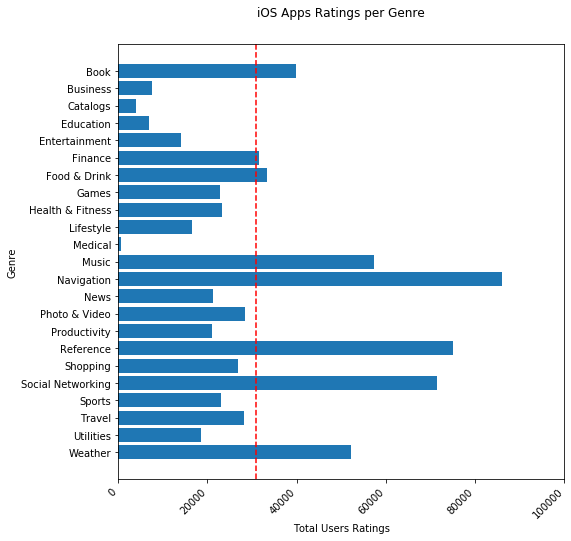

In [25]:
# 8.3 Using visualizations with matplotlib 

# 8.3.1 Import module
import numpy as np
import matplotlib.pyplot as plt

# 8.3.2 Defining a function to better visualizations in all datasets cases
def visu_gen(dataset, limit, title, x_label, y_label):

# 8.3.3 Attributing referred objects
    group_data = list(dataset.values())
    group_names = list(dataset.keys())
    group_mean = np.mean(group_data)

# 8.3.4 Dimensioning graphics
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.barh(group_names, group_data)
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')

# 8.3.5 Adding a vertical average line
    ax.axvline(group_mean, ls='--', color='r')

# 8.3.6 Assigning titles and labels
    ax.title.set(y=1.05)
    ax.set(xlim=[0, limit], xlabel= x_label , ylabel= y_label,
            title= title)
    
    plt.plot()


visu_gen(install_a, 100000, 'iOS Apps Ratings per Genre', 'Total Users Ratings', 'Genre')

Android Apps Installs per Genre:


{'WEATHER': 5074486, 'VIDEO_PLAYERS': 24727872, 'TRAVEL_AND_LOCAL': 13984078, 'TOOLS': 10801391, 'SPORTS': 3638640, 'SOCIAL': 23253652, 'SHOPPING': 7036877, 'PRODUCTIVITY': 16787331, 'PHOTOGRAPHY': 17840110, 'PERSONALIZATION': 5201483, 'PARENTING': 542604, 'NEWS_AND_MAGAZINES': 9549178, 'MEDICAL': 120551, 'MAPS_AND_NAVIGATION': 4056942, 'LIFESTYLE': 1437816, 'LIBRARIES_AND_DEMO': 638504, 'HOUSE_AND_HOME': 1331541, 'HEALTH_AND_FITNESS': 4188822, 'GAME': 15588016, 'FOOD_AND_DRINK': 1924898, 'FINANCE': 1387692, 'FAMILY': 3695642, 'EVENTS': 253542, 'ENTERTAINMENT': 11640706, 'EDUCATION': 1833495, 'DATING': 854029, 'COMMUNICATION': 38456119, 'COMICS': 817657, 'BUSINESS': 1712290, 'BOOKS_AND_REFERENCE': 8767812, 'BEAUTY': 513152, 'AUTO_AND_VEHICLES': 647318, 'ART_AND_DESIGN': 1986335}


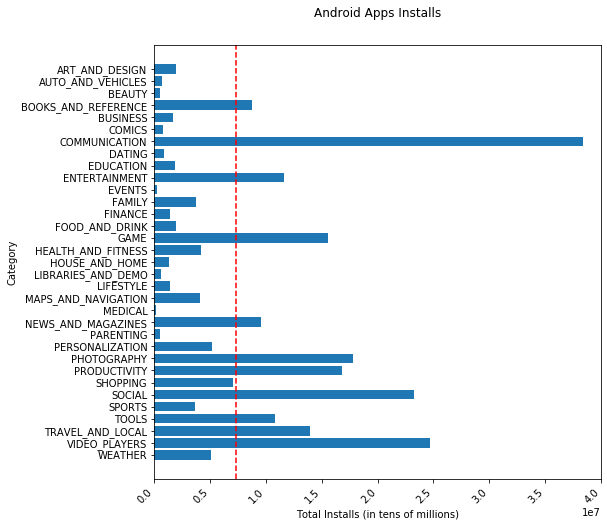

In [16]:
# 8.4 Using a frequence table technique in Google Play Store dataset

category_google = genre_freq_table(g_apps_free, 1) #isolating app of each genre (prime genre - column 1)

# 8.4.1 Number of installs per category

install_g = {}

for category in category_google:
    total_category = 0
    len_category = 0
    for g_apps in g_apps_free:
        category_app = g_apps[1]
        if category_app == category:
            n_installs = g_apps[5]
            n_installs = n_installs.replace(',','') #using replace built-in to fix data entries
            n_installs = n_installs.replace('+','')
            n_installs = int(n_installs)
            total_category += n_installs
            len_category += 1
    
    avg_install = total_category/len_category
    install_g[category] = round(avg_install)

    
print('Android Apps Installs per Genre:')
print('\n')
print(install_g)

visu_gen(install_g, 40000000, 'Android Apps Installs', 'Total Installs (in tens of millions)', 'Category')


Android Reviews per Category:


{'WEATHER': 171251, 'VIDEO_PLAYERS': 425350, 'TRAVEL_AND_LOCAL': 129484, 'TOOLS': 305733, 'SPORTS': 116939, 'SOCIAL': 965831, 'SHOPPING': 223887, 'PRODUCTIVITY': 160635, 'PHOTOGRAPHY': 404081, 'PERSONALIZATION': 181122, 'PARENTING': 16379, 'NEWS_AND_MAGAZINES': 93088, 'MEDICAL': 3730, 'MAPS_AND_NAVIGATION': 142860, 'LIFESTYLE': 33922, 'LIBRARIES_AND_DEMO': 10926, 'HOUSE_AND_HOME': 26435, 'HEALTH_AND_FITNESS': 78095, 'GAME': 683524, 'FOOD_AND_DRINK': 57479, 'FINANCE': 38536, 'FAMILY': 113143, 'EVENTS': 2556, 'ENTERTAINMENT': 301752, 'EDUCATION': 56293, 'DATING': 21953, 'COMMUNICATION': 995608, 'COMICS': 42586, 'BUSINESS': 24240, 'BOOKS_AND_REFERENCE': 87995, 'BEAUTY': 7476, 'AUTO_AND_VEHICLES': 14140, 'ART_AND_DESIGN': 24699}




iOS Ratings per Genre:


{'Weather': 3.5, 'Utilities': 3.5, 'Travel': 3.5, 'Sports': 3.1, 'Social Networking': 3.6, 'Shopping': 4.0, 'Reference': 3.7, 'Productivity': 4.0, 'Photo & Video': 3.9, 'News': 3.2, 'Navigation': 3.8, 'Mu

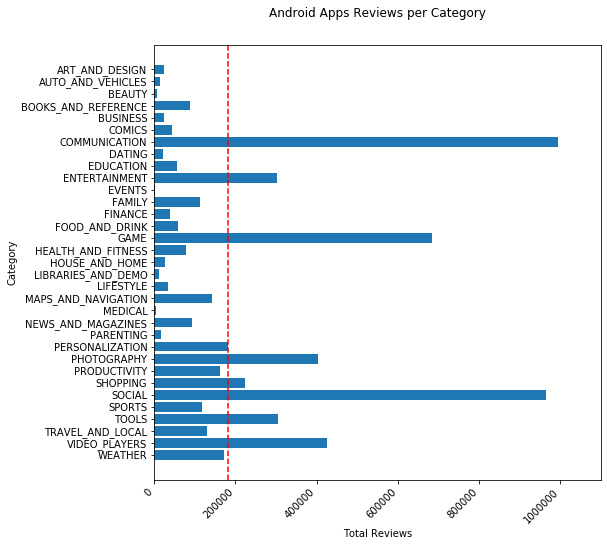

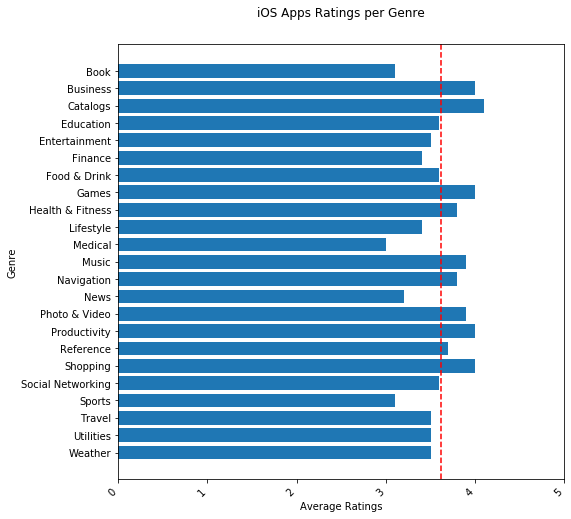

In [17]:
# 8.5 To gathering ratings per iOS Apps per category  

ratings_a = {}

for a_genre in genre_apple: #1st iterate(main loop)
    total_genre = 0 #store the sum of user ratings
    len_genre = 0 #store the number of apps specific to each genre
    for a_app in a_apps_free: #2nd iterate (nested loop)
        genre_app = a_app[11]
        if genre_app == a_genre: #condition: genre in a_apps_free == genre in genre_apple(freq_table)
            a_ratings = float(a_app[7]) #a_apps[7] = user_rating(proxy)
            total_genre += a_ratings #sum up user rating of each genre
            len_genre += 1
    
    avg_u_ratings = total_genre/len_genre
    ratings_a[a_genre] = round(avg_u_ratings, 1)
    
# 8.6 To gathering reviews per Android Apps category

reviews_g = {}

for category in category_google:
    total_category = 0
    len_category = 0
    for g_apps in g_apps_free:
        category_app = g_apps[1]
        if category_app == category:
            n_reviews = g_apps[3]
            total_category += float(n_reviews)
            len_category += 1
            
    
    avg_reviews = total_category/len_category
    reviews_g[category] = round(avg_reviews)


print('Android Reviews per Category:')
print('\n')
print(reviews_g)
print('\n')
visu_gen(reviews_g, 1100000, 'Android Apps Reviews per Category', 'Total Reviews', 'Category')
print('\n')
print('iOS Ratings per Genre:')
print('\n')
print(ratings_a)
print('\n')
visu_gen(ratings_a, 5.0, 'iOS Apps Ratings per Genre', 'Average Ratings', 'Genre')

### 9. Conclusion 

After we considered other parameteres besides the Apps quantity percentage per genre, such as User Conversion (total of installs) and Usability (reviews and user ratings) indicators, the decision making about Apps building is better guided. Overall, the genres that did demonstrated most high or above average numbers in all evaluated indicators seems to show solid behavior in their positions.

9.1 In **Google Play Store dataset analysis**, **Games** and **Tools** categories demonstrate good behavior, such as:

**Games**: 

- **2nd most common** category (9.72% of total), more than **15 milions of installs (120% above average)** and **3rd most reviewed** (683.524 reviews);   

**Tools**: 

- **3rd most common** category (8.46% of total), more than **10 milions of installs (53,4% above average)** and **6th most reviewed** (305.733 reviews);


9.2 In **Apple Store dataset analysis**, **Games** and **Social Networking** categories demonstrate good behavior, cause:

**Games**: 

- **1sf most common** genre (58.13% of total), more than **22.813 of reviews (27.5% below average)** and **2nd top rated** (average 4.0);   

**Social Networking**: 

- **5th most common** genre (3.26% of total), **3rd most reviewed (127% above average)** and **on average between iOS Apps** (average 3.6).

### 10. Final Considerations

We hope that companies and anyone that want for guidance use this data analysis to help their insights and developments. Even though this article have been developed and written by just a person, all technical instructions, sources and recomendations was absorved at a pleasurably study journey during the Python for Data Science: Fundamentals course, powered by Dataquest.io company.    

For any questions, suggestions or corrections, send me a mail or message that I'll answer with pleasure!

e-mail: osmancesar.mr@gmail.com

linkedin: https://www.linkedin.com/in/osman-rodrigues/

Github: https://github.com/OsmanRodrigues